In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/force2020_data.csv')

In [ ]:
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [ ]:
data.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81


In [ ]:
data.isna().sum()/len(data)*100

,0
RHOB,0.000000
GR,0.000000
DEPTH_MD,0.000000
NPHI,23.196497
PEF,10.016420
DTC,0.443350


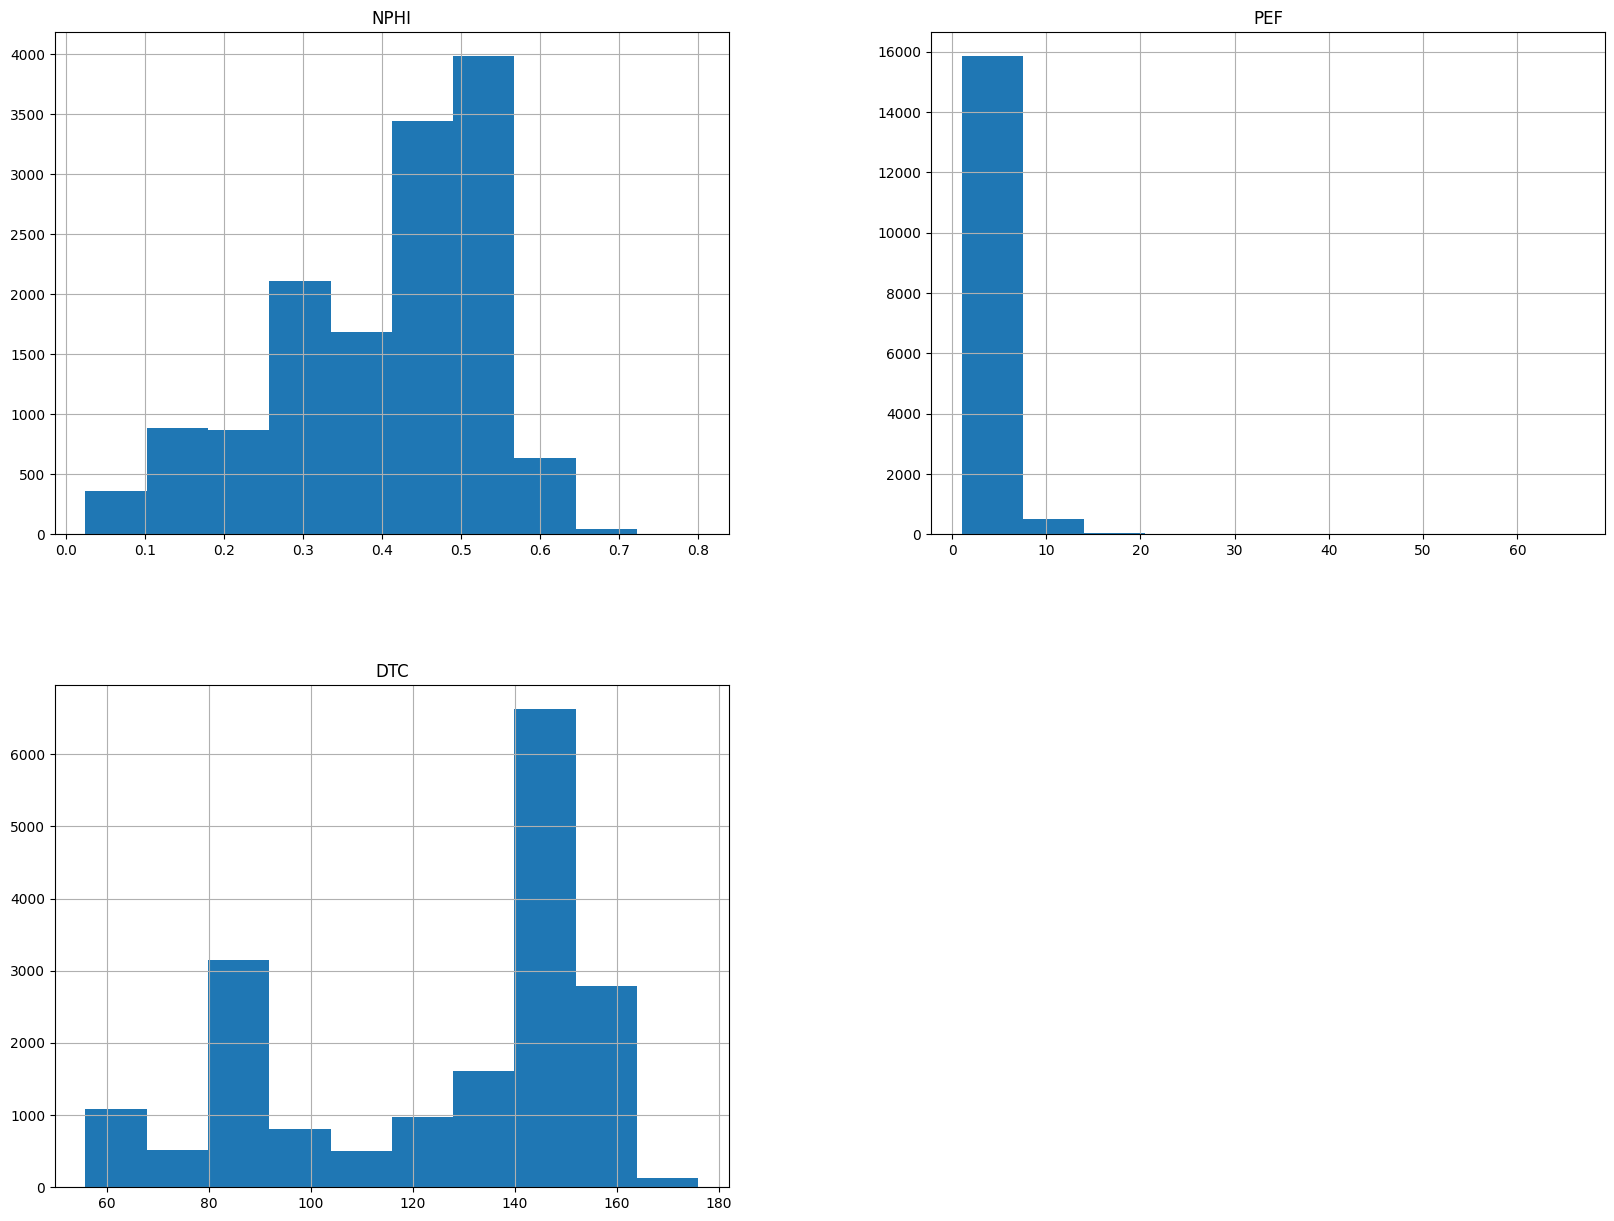

In [ ]:
freqgraph=data[['NPHI','PEF','DTC']].select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [ ]:
data['NPHI']=data['NPHI'].fillna(data['NPHI'].median())

In [ ]:
data['NPHI'].isna().sum()

0

In [ ]:
data['PEF']=data['PEF'].fillna(data['PEF'].median())

In [ ]:
data['PEF'].isna().sum()

0

In [ ]:
data['DTC']=data['DTC'].fillna(data['DTC'].median())

In [ ]:
data['DTC'].isna().sum()

0

In [ ]:
data.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,0
PEF,0
DTC,0


In [ ]:
data.columns

Index(['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC'], dtype='object')

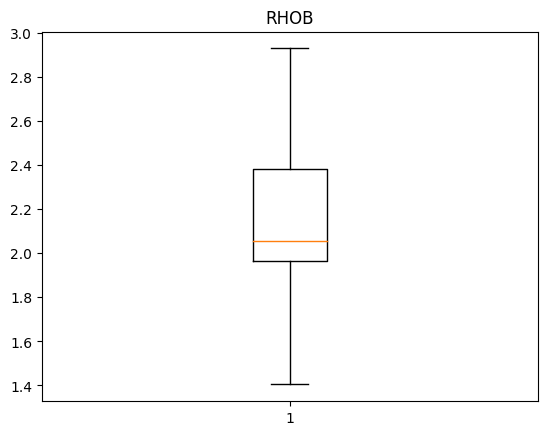

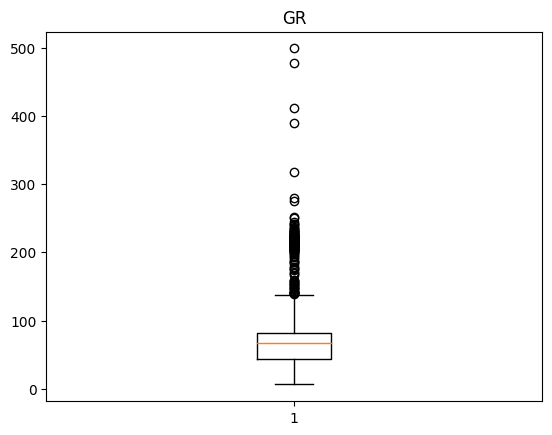

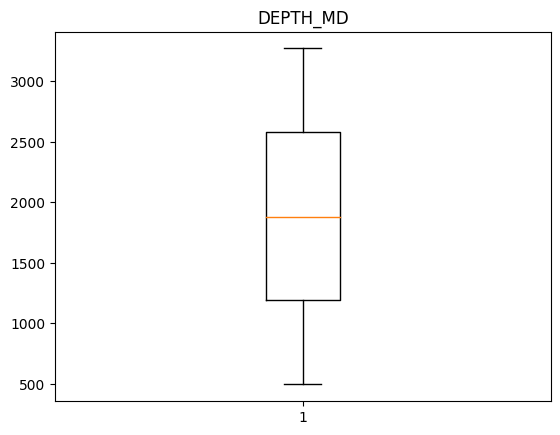

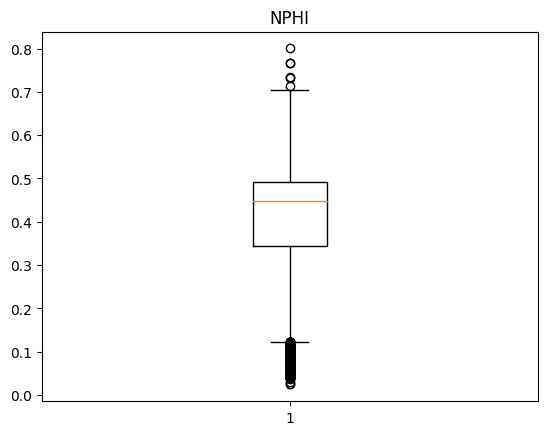

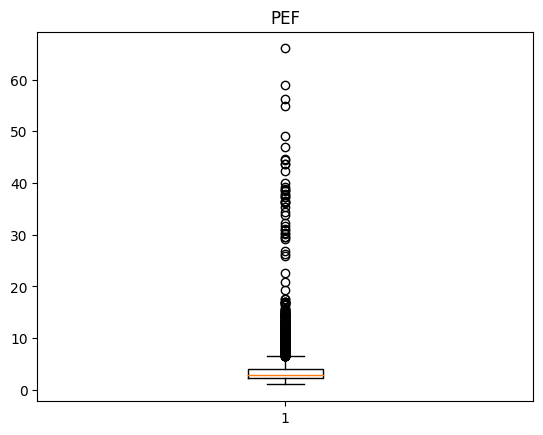

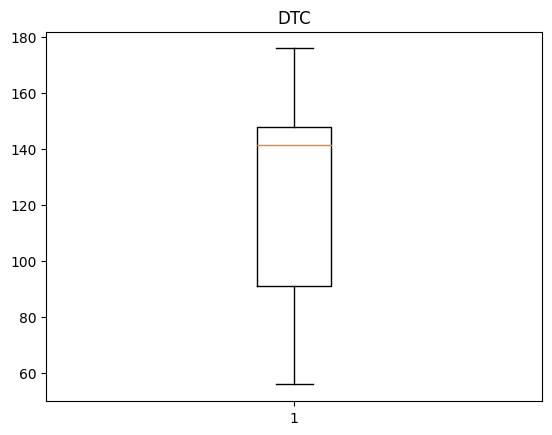

In [ ]:
for i in ['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC']:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
columns_scale=['RHOB','NPHI']
data[columns_scale]=sc.fit_transform(data[columns_scale])

In [ ]:
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,-0.759999,80.200851,494.528,0.285088,20.915468,161.131180
1,-0.741163,79.262886,494.680,0.285088,19.383013,160.603470
2,-0.718560,74.821999,494.832,0.285088,22.591518,160.173615
3,-0.734045,72.878922,494.984,0.285088,32.191910,160.149429
4,-0.773944,71.729141,495.136,0.285088,38.495632,160.128342


In [ ]:
x=data[['RHOB', 'NPHI']]
x.head()

,RHOB,NPHI
0,-0.759999,0.285088
1,-0.741163,0.285088
2,-0.718560,0.285088
3,-0.734045,0.285088
4,-0.773944,0.285088


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_
  wcss.append(css)

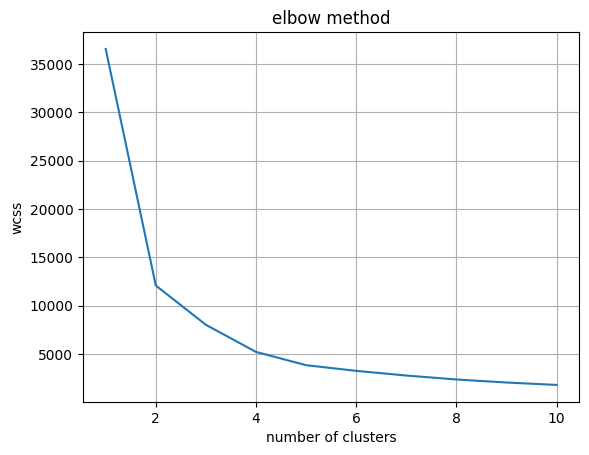

In [ ]:
plt.plot(range(1,11),wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.title('elbow method')
plt.grid()

In [ ]:
km=KMeans(n_clusters=4,n_init=10)
km.fit(x)

KMeans(n_clusters=4, n_init=10)

In [ ]:
cluster_label=km.predict(x)

In [ ]:
cluster_label

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

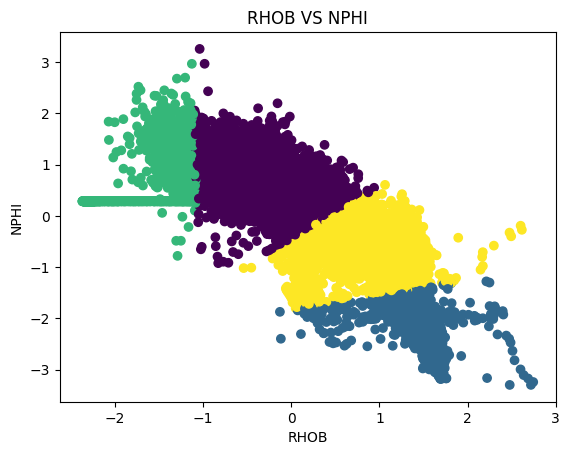

In [ ]:
plt.scatter(x['RHOB'],x['NPHI'],c=cluster_label)
plt.xlabel('RHOB')
plt.ylabel('NPHI')
plt.title('RHOB VS NPHI')
plt.show()

In [ ]:
data['cluster labels']=cluster_label

In [ ]:
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,cluster labels
0,-0.759999,80.200851,494.528,0.285088,20.915468,161.131180,0
1,-0.741163,79.262886,494.680,0.285088,19.383013,160.603470,0
2,-0.718560,74.821999,494.832,0.285088,22.591518,160.173615,0
3,-0.734045,72.878922,494.984,0.285088,32.191910,160.149429,0
4,-0.773944,71.729141,495.136,0.285088,38.495632,160.128342,0


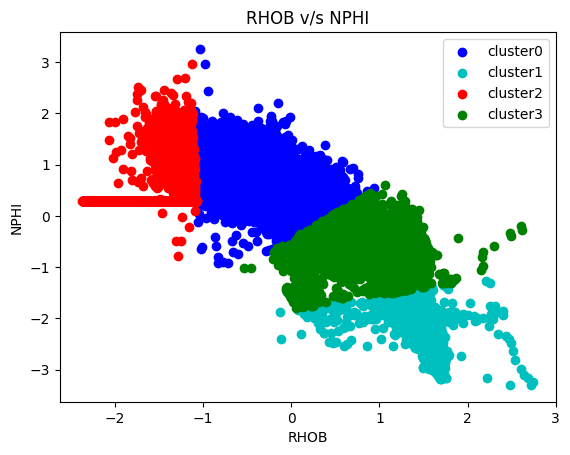

In [ ]:
colors=['b','c','r','g']
for i in range(max(cluster_label+1)):
  cluster_data=x[cluster_label==i]
  plt.scatter(cluster_data['RHOB'],cluster_data['NPHI'],c=colors[i],label=f'cluster{i}')
plt.xlabel('RHOB')
plt.ylabel('NPHI')
plt.title('RHOB v/s NPHI')
plt.legend()
plt.show()

In [ ]:
def predict_cluster(rhob, nphi):
    new_data = [[rhob, nphi]]
    cluster = km.predict(new_data)
    return cluster[0]

rhob = 2
nphi = 3
predicted_cluster = predict_cluster(rhob, nphi)
print(f"The predicted cluster for point ({rhob}, {nphi}) is: {predicted_cluster}")


The predicted cluster for point (2, 3) is: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Agglomerative clustering

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [ ]:
mergings=linkage(x,method='ward')

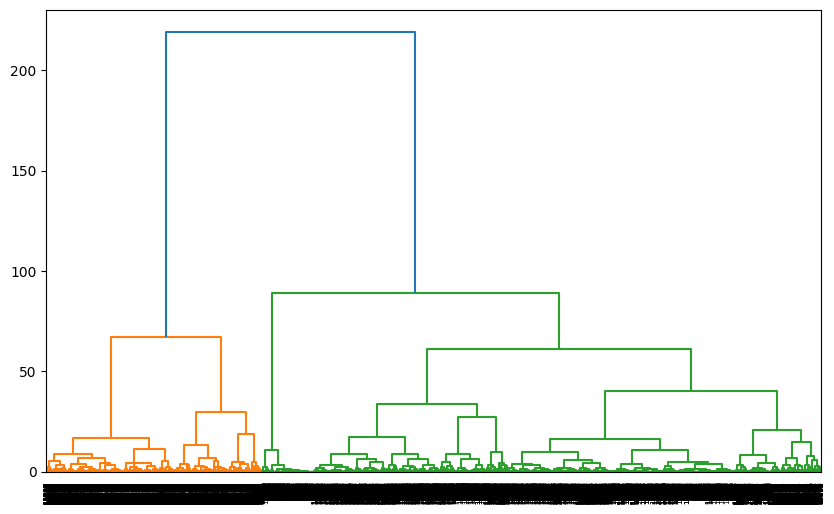

In [ ]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [ ]:
cluster_label=fcluster(mergings,200,criterion='distance')

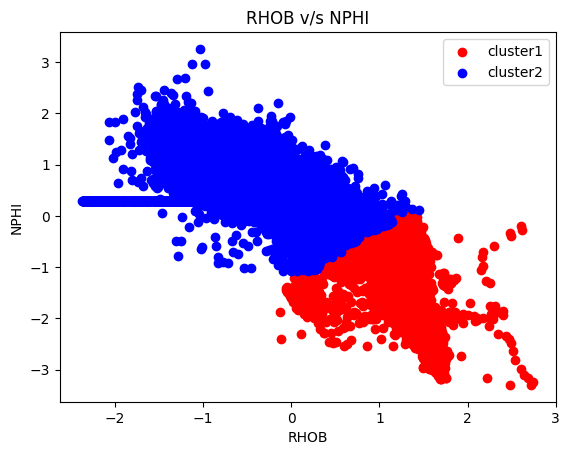

In [ ]:
colors=['r','b']
for i in range(1,max(cluster_label+1)):
  cluster_data=x[cluster_label==i]
  plt.scatter(cluster_data['RHOB'],cluster_data['NPHI'],c=colors[i-1],label=f'cluster{i}')
plt.xlabel('RHOB')
plt.ylabel('NPHI')
plt.title('RHOB v/s NPHI')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x,cluster_label)
print(sil_avg)

0.6169823462077547
